# Directing Customers to Subscription through App Behavior Analysis

Data Source: https://www.kaggle.com/datasets/nhanguyenuic/fintech-classification-for-app-subsciption 

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import os
np.random.seed(123)
%matplotlib inline

In [2]:
#Import Data set
dataset = pd.read_csv('FineTech_appData.csv', sep = ",")

### Exploratory Data Analysis

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Day of the week average - 3rd day
#Average age is 31 years old
#Average number of screens 21
#minigame played by 10% of the users
#Premium features used by 17% of the users
# 62% have enrolled on some app features
#17% of the people have liked at least one screen

In [6]:
#Data Cleaning - Currently hour is a string, convert it to integer
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
#Plot histogram
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled']) #Dropping columns that we don't need

In [8]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


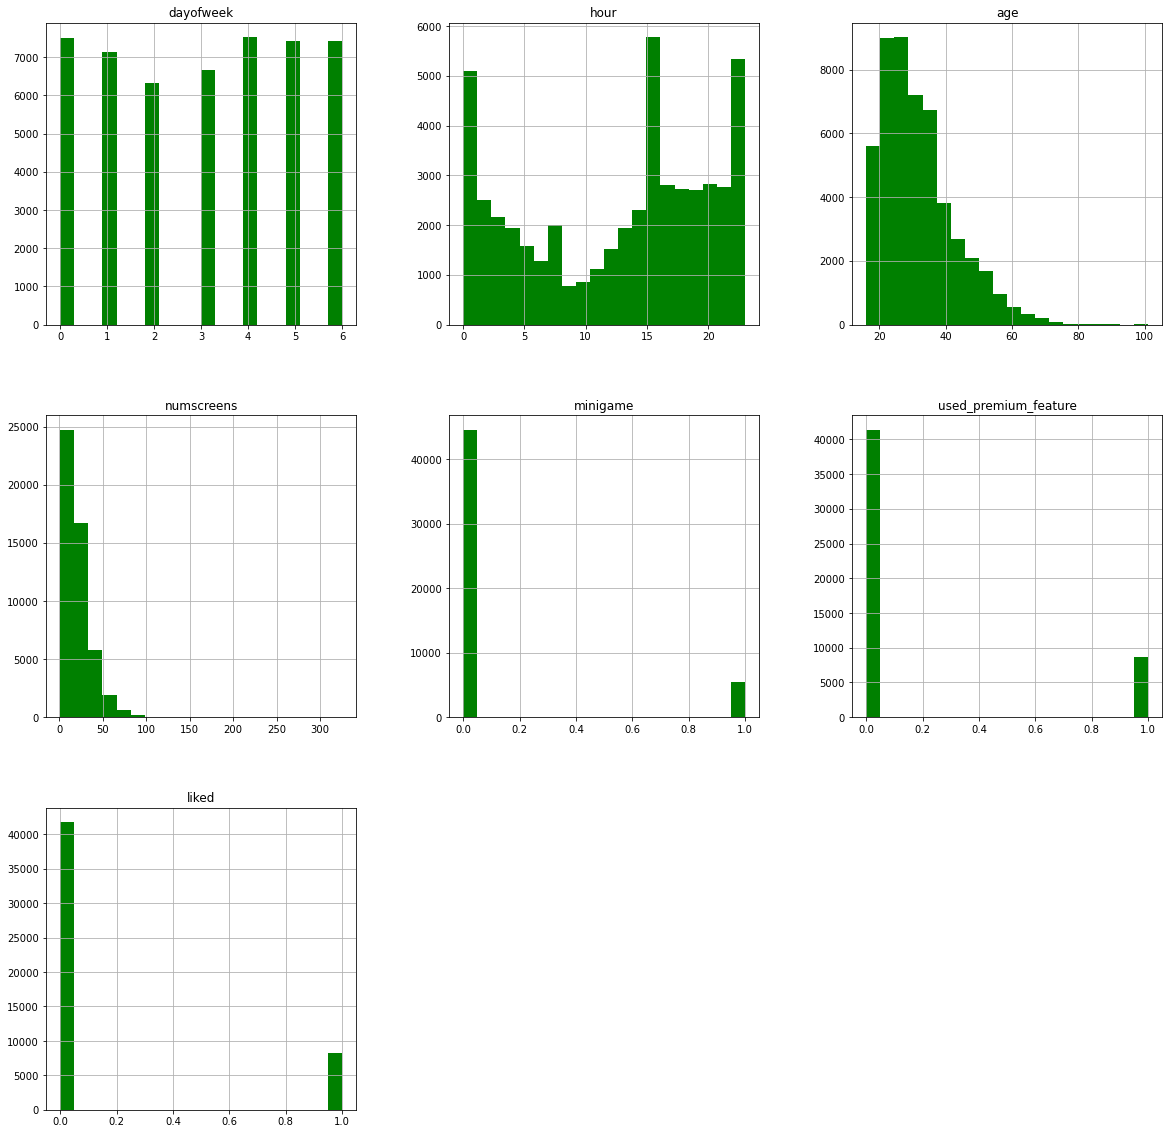

In [9]:
#Plot histograms to understand the distribution of the features

dataset2.hist(bins = 20, figsize = (20, 20), color = 'g')


plt.show()

In [10]:
#day of the week: even distribution
#hour: Dip in hour around 10 (utc hours)
#Age: evenly distrubuted (there are some jumps in 29-30, 41 and 51)
#numscreens: evenly distributed
#minigame: most poeple haven't played it (0)
#premium feature: most people have not used the premium feature
#liked: most people haven't liked premium feature since they haven't used it.

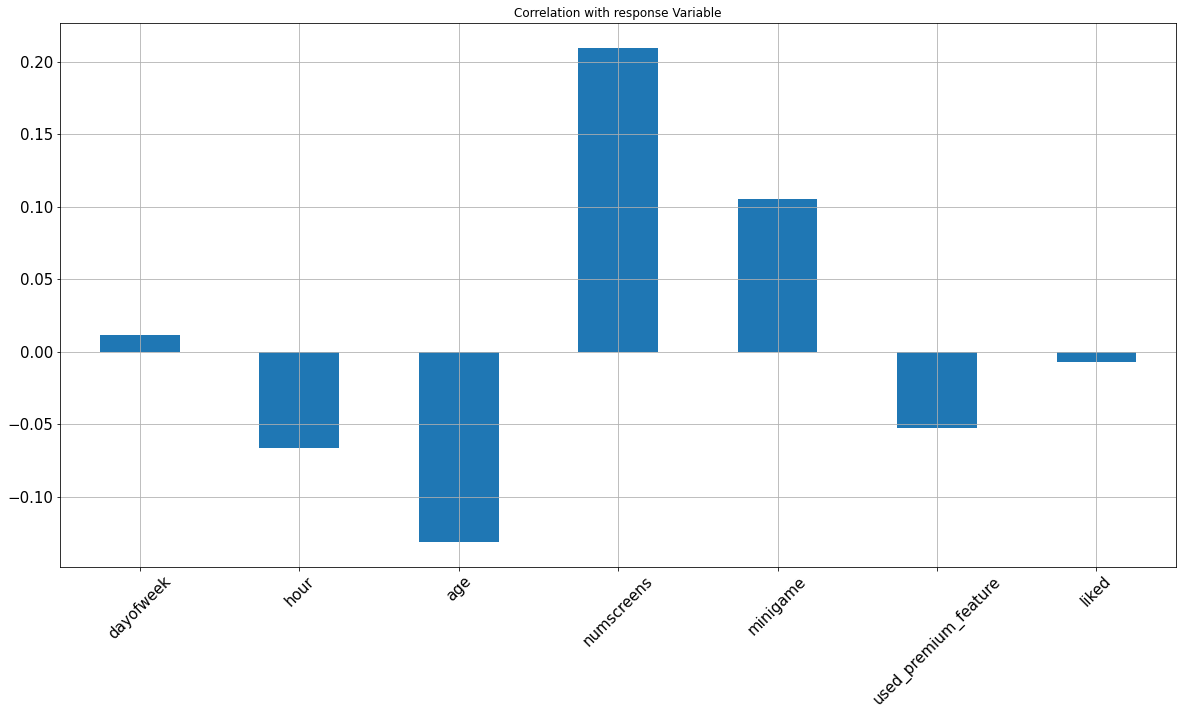

In [11]:
#Correlation plot with the Response feature to understand how independent feature effects the response variable (enrolled)
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                            title = 'Correlation with response Variable',
                                            fontsize = 15, rot = 45,
                                            grid = True)

plt.show()

In [12]:
#day of the week is positively correlated - not a big relation
# hour is negatively correlated - the earlier the hour the less likely to enroll
#Age - the older the person the less lilely to enroll
#numscreens - positively correlated - more screens you have seen more engagement there is
#minigame - positively correlated, the more games user plays, the more likely they are to enroll
#User premium feature is negatively correlated to the response variable.

In [13]:
#Exploring Correlations
correlations = dataset2.corr()


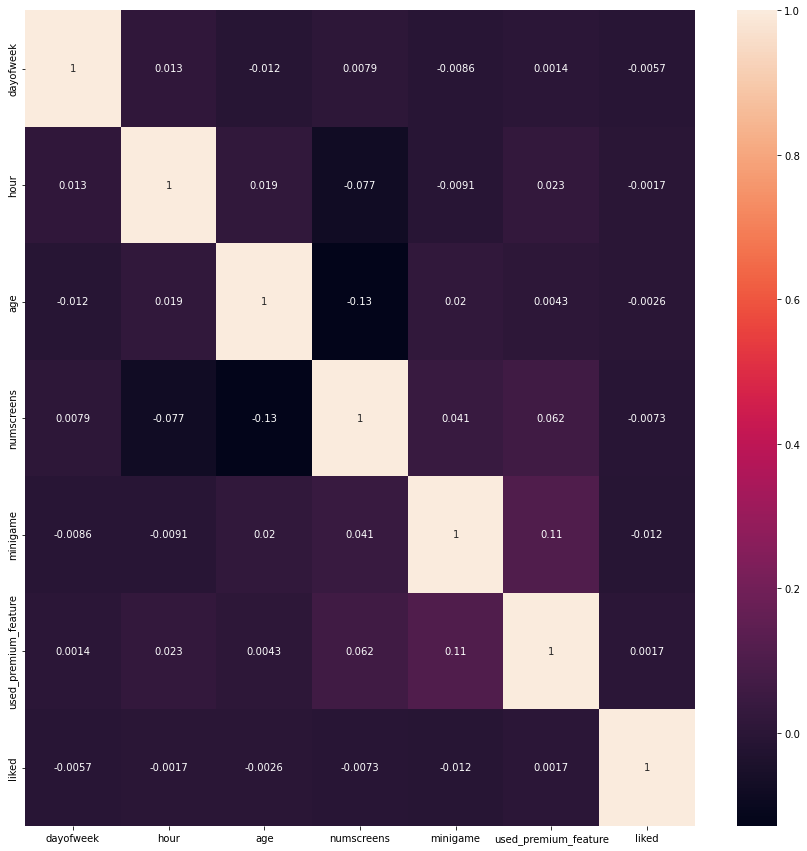

In [14]:
#Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize = (15,15)) #Create figure and axis with specific size.
sns.heatmap(correlations, annot = True) # Create heatmap with annotations
plt.show()

### Feature Engineering

In [15]:
#Let's look at the response variable

In [16]:
#Let's start by looking at the data types
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
#parse the hours into date time object
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]



In [18]:
#Parse the enrolled date column into datetime object - if row has values, then  perform row data function, otherwise skip
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [19]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [20]:
#Now I create a new column called difference to calculate the difference between enrolled date and date first opened and convert the values into timedelta of hours, to get the values in hours
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')


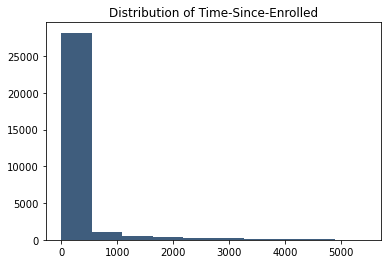

In [21]:
#Quickly plot the difference column to select the best time for cutoff time for the response variable
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [22]:
#From the distribution of the histogram, I can see that majority of the people enroll within the first 500 hours.
#Let's take a look at the range between 0-100. 

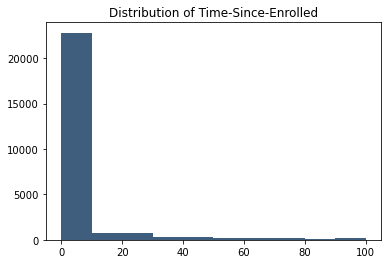

In [23]:
#Quickly plot the difference column to select the best time for cutoff time for the response variable
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [24]:
#From the plot it seems like most people enroll within the first 10 hours. The distribution is also right skewed. let's take 48 hours as cutoff.

In [25]:
#in the difference column, if the difference is more than 48 hours and they are enrolled, we set them as 0.
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [26]:
#Drop the columns that we no longer need
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [27]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [28]:
#Let's look at the screens feature

In [29]:
#Screen list has comma seperated values. A second data set gives a list of most popular screens
top_screens = pd.read_csv('top_screens.csv', sep = ",").top_screens.values


In [30]:
#Let's create columns for popular screens and let's create another column for the counts

dataset['screen_list'] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

In [31]:
#Create a column called 'other' - it will indicate how many left over screens there are

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ['screen_list'])

In [32]:
#Create Funnels - a group of screens that belongs to the same set (screens)

savings_screens = ['Saving1', 'Saving2', 'Saving2Amount', 
                   'Saving4', 'Saving5', 'Saving6', 'Saving7',
                   'Saving8', 'Saving9', 'Saving10']

In [33]:
#Dataset
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1) # Counts columns that have these names and sums them all up

In [34]:
#Drop the columns with saving screens
dataset = dataset.drop(columns = savings_screens)

In [35]:
#Now create funnels for other pages for CM Screens, CC screens and Loan screens
#CM Screens (Credit Monitoring Screens)
cm_screens = ['Credit1', 'Credit2', 'Credit3',
             'Credit3Container', 'Credit3Dashboard']

dataset['CMCount'] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [36]:
#Now create funnels for other pages for CM Screens, CC screens and Loan screens
#CC Screens (Credit Card Screens)
cc_screens = ['CC1', 'CC1Category', 'CC3']

dataset['CCCount'] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

In [37]:
#Now create funnels for other pages for CM Screens, CC screens and Loan screens
#Loan Screens (Loan Screens)
loan_screens = ['Loan', 'Loan2', 'Loan3', 'Loan4']

dataset['LoansCount'] = dataset[loan_screens].sum(axis = 1)
datasaet = dataset.drop(columns = loan_screens)

I do this because these screens will be strongly correlated and I don't want correlated fields in the dataset

In [38]:
#Take a look at the head
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,10,0,2,0,1


In [39]:
#dataset statistics
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.506380,...,0.016180,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499964,...,0.126169,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [40]:
#Saving the new dataset into csv format calling it new_app_data
#dataset.to_csv('new_appdata101.csv', index = False)

### Data Pre-Processing

In [41]:
#Split the response variable from the independent features

response = dataset['enrolled']

In [42]:
#Remove the response variable from the original data set
dataset = dataset.drop(columns = 'enrolled')

In [43]:
#Split the dataset
from sklearn.model_selection import train_test_split

In [44]:
#create the train test split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [45]:
#Save the user labels before dropping for model development
#train identifier
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

In [46]:
#Test Identifier
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [47]:
#Now we need to scale the data
from sklearn.preprocessing import StandardScaler

In [48]:
sc_X = StandardScaler() #instantiate the standard scaler - returns a numpy array - loses the column names and the index

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

In [49]:
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [50]:
X_train2.columns = X_train.columns.values #Map the columns to original values
X_test2.columns = X_test.columns.values

In [51]:
#Bring in the indexes
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [52]:
#now bring in the labels to the original training set
X_train = X_train2
X_test = X_test2

### Model Development

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
classifier = LogisticRegression(random_state = 0) 
#L1 is going to change the model from logistic regression to L1 regularization to avoid multicollinearity issues
# L1 Lasso Regularization penalizes any particular field that's strongly correlated to the response variable
#fit to the training set
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred = classifier.predict(X_test) #Predictions

In [58]:
#Evalulation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [59]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7664

In [60]:
#Precision
precision_score(y_test, y_pred)

0.7594075260208166

In [61]:
#Recall
recall_score(y_test, y_pred)

0.7698863636363636

In [62]:
#F1 Score - Function of recall and precision
f1_score(y_test, y_pred)

0.7646110439338976

Test Data Accuracy: 0.7664


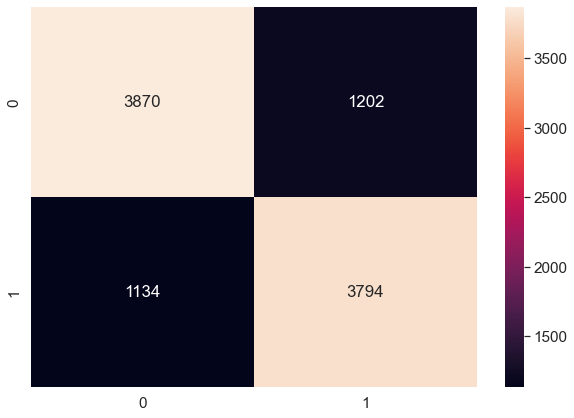

In [65]:
#Let's plot the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print("Test Data Accuracy: %0.4f"% accuracy_score(y_test, y_pred))
plt.show()

### K Fold Cross-validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )

In [69]:
print("Logistic Accuracy: %0.3f(+/- %0.3f)" % (accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.768(+/- 0.009)


The model is very consistent when it comes to accuracy

### Conclusion

In [70]:
#Formatting the final results
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [71]:
#Create a column with the predicted results
final_results['predicted_results'] = y_pred

In [72]:
#Create a cleaner version
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


This is the way to map the predictions back to the users. 